In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


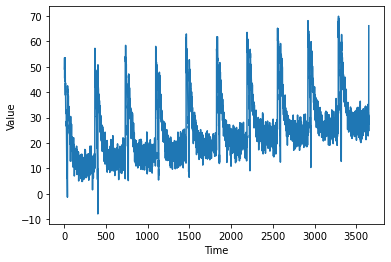

In [ ]:
def plot_series(time,series,format="-",start=0,end=None):
    plt.plot(time[start:end],series[start:end],format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time,slope=0):
    return slope*time

def seasonal_pattern(season_time):
        return np.where(season_time<0.1,np.cos(season_time*6*np.pi),2/np.exp(9*season_time))

def seasonality(time,period,amplitude=1,phase=0):
    season_time=((time+phase)%period)/period
    return amplitude*seasonal_pattern(season_time)

def noise(time,noise_level=1,seed=None):
    rnd=np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

time=np.arange(10*365+1,dtype="float32")
baseline=10
series=trend(time, 0.1)  
baseline=10
amplitude=40
slope=0.005
noise_level=3

series=baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
series+=noise(time, noise_level, seed=51)
split_time=3000
time_train=time[:split_time]
x_train=series[:split_time]
time_valid=time[split_time:]
x_valid=series[split_time:]
window_size=20
batch_size=32
shuffle_buffer_size=1000

plot_series(time,series)

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1),input_shape=[None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x:x*100.0)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),optimizer=optimizer,metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
94/94 [==============================] - 18s 36ms/step - loss: 15.2453 - mae: 15.7419
Epoch 2/100
94/94 [==============================] - 3s 35ms/step - loss: 11.8539 - mae: 12.3428
Epoch 3/100
94/94 [==============================] - 4s 36ms/step - loss: 6.4957 - mae: 6.9722
Epoch 4/100
94/94 [==============================] - 4s 35ms/step - loss: 5.9942 - mae: 6.4744
Epoch 5/100
94/94 [==============================] - 4s 36ms/step - loss: 5.9224 - mae: 6.4015
Epoch 6/100
94/94 [==============================] - 4s 36ms/step - loss: 5.8381 - mae: 6.3161
Epoch 7/100
94/94 [==============================] - 3s 35ms/step - loss: 5.7604 - mae: 6.2391
Epoch 8/100
94/94 [==============================] - 3s 35ms/step - loss: 5.6720 - mae: 6.1474
Epoch 9/100
94/94 [==============================] - 3s 35ms/step - loss: 5.6167 - mae: 6.0943
Epoch 10/100
94/94 [==============================] - 4s 36ms/step - loss: 5.5324 - mae: 6.0094
Epoch 11/100
94/94 [========================

(1e-08, 0.0001, 0.0, 30.0)

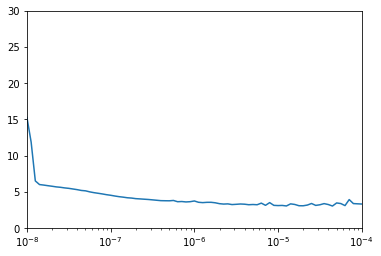

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1),input_shape=[None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x:x*100.0)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=500,verbose=1)                                                   

Epoch 1/500
94/94 [==============================] - 13s 36ms/step - loss: 192.9545 - mae: 8.8590
Epoch 2/500
94/94 [==============================] - 3s 35ms/step - loss: 39.2100 - mae: 4.0143
Epoch 3/500
94/94 [==============================] - 4s 35ms/step - loss: 32.6916 - mae: 3.7449
Epoch 4/500
94/94 [==============================] - 3s 35ms/step - loss: 30.9650 - mae: 3.7348
Epoch 5/500
94/94 [==============================] - 4s 36ms/step - loss: 28.2391 - mae: 3.5486
Epoch 6/500
94/94 [==============================] - 3s 35ms/step - loss: 27.2258 - mae: 3.4420
Epoch 7/500
94/94 [==============================] - 3s 35ms/step - loss: 30.0627 - mae: 3.7156
Epoch 8/500
94/94 [==============================] - 3s 35ms/step - loss: 27.3457 - mae: 3.5119
Epoch 9/500
94/94 [==============================] - 3s 35ms/step - loss: 26.6171 - mae: 3.4388
Epoch 10/500
94/94 [==============================] - 3s 35ms/step - loss: 26.4637 - mae: 3.4352
Epoch 11/500
94/94 [=================

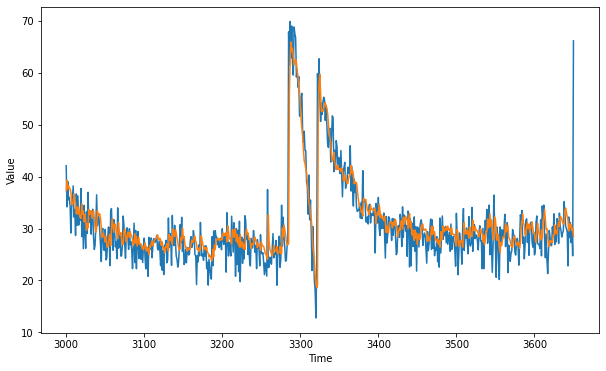

In [ ]:
forecast=[]
results=[]
for time in range(len(series)-window_size):
  forecast.append(model.predict(series[time:time+window_size][np.newaxis]))

forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]


plt.figure(figsize=(10,6))

plot_series(time_valid,x_valid)
plot_series(time_valid,results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid,results).numpy()

3.0603707

<Figure size 432x288 with 0 Axes>

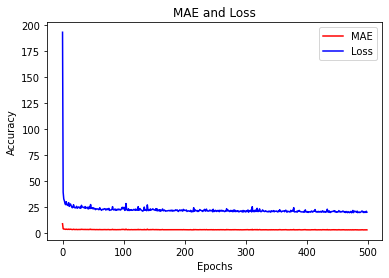

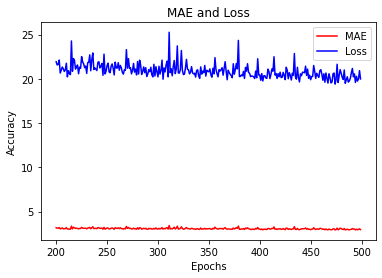

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss))
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()